# 0. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/FT1000_v1.csv')
df.head()

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Country1,Sector1
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016,Finland,Technology
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013,Lithuania,Health
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012,UK,Financial Services
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016,UK,Technology
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017,Germany,Energy


## 3.2. Quan hệ giữa một số cột
### 3.2.1. Quan hệ giữa cột `Country` và `CAGR`

In [ ]:
#Make 2 subplots
fig = make_subplots(
    cols = 2,
    specs = [[{'type': 'Choropleth'}, {'type': 'Choropleth'}]], #Specify type of each subplot
    subplot_titles = ['Mean CAGR by Country', 'Max CAGR by Country'],
)

#Plot mean CAGR by country
data = df[['Country', 'CAGR']].groupby(by = ['Country']).mean().reset_index()
fig.add_trace(go.Choropleth(
    locations = data['Country'], locationmode = 'country names', z = data['CAGR'],
    colorbar = {'x': 0.45}
), row = 1, col = 1)#Set plot position

#Plot max CAGR by country
data = df[['Country', 'CAGR']].groupby(by = ['Country']).max().reset_index()
fig.add_trace(go.Choropleth(
    locations = data['Country'], locationmode = 'country names', z = data['CAGR'],
    colorbar = {'x': 1.05}
), row = 1, col = 2)#Set plot position

#Update layout for easy reading
fig.update_layout(
    geo_scope = 'europe', geo2_scope = 'europe', height = 450, width = 1000,
    margin = {'t': 50, 'b': 0, 'l': 0, 'r': 0},
)

Đa số các nước có mức CAGR thấp, vào khoảng từ 60 tới trên 120%, một số nước có CAGR trung bình cao hơn hẳn là Austria (Áo) với khoảng hơn 140%, Latvia với khoảng 200%. Quan sát qua biểu đồ Max CAGR by Country, ta thấy không phải quốc gia nào có mức CAGR trung bình thấp cũng có mức CAGR tối đa thấp như Finland (Phần Lan), UK (Vương Quốc Anh), France (Pháp), Germany (Đức), Italy (Ý) có mức CAGR tối đa thuộc hàng cao nhưng có CAGR trung bình thuộc hàng thấp. Ta có thể quan sát thêm biểu đồ dưới đây để hiểu rõ hơn

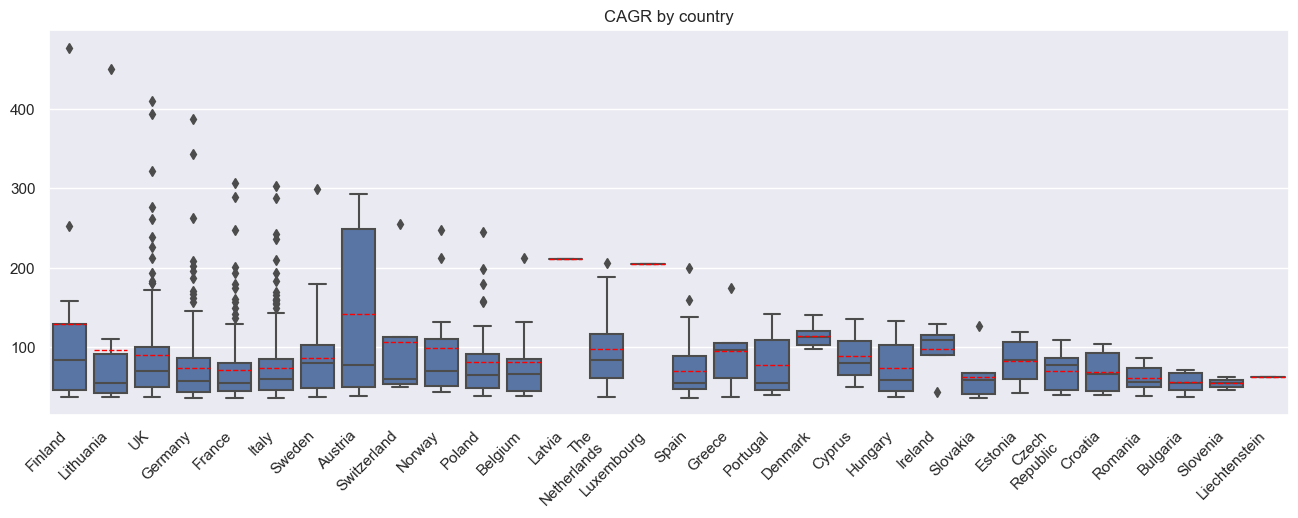

In [ ]:
plt.figure(figsize = (16, 5))

ax = sns.boxplot(data = df, x = 'Country', y = 'CAGR', color = 'C0', showmeans = True, meanline = True, meanprops = {'color': 'red'})

ax.set_xticklabels([label.replace(' ', '\n') for label in df['Country'].unique()], rotation = 45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('CAGR by country');

Quan sát biểu đồ trên ta có thể thấy lí do nhiều nước có CAGR trung bình thấp dù có CAGR tối đa cao là do các nước này có nhiều công ty được xếp hạng, các công ty có mức CAGR thấp quá nhiều sẽ kéo mức CAGR trung bình của nước đó xuống. Một số nước có CAGR cao vượt trội là do nước đó chỉ có một công ty được xếp hạng và công ty đó cũng có CAGR cao

### 3.2.2 Quan hệ giữa cột `Country` và `Revenue`
Ở đây ta chỉ xét Revenue2020, tức doanh thu năm 2020

In [ ]:
data = df[['Country', 'Revenue2020']].groupby(by = ['Country']).mean().reset_index()

fig = px.choropleth(
    data_frame = data, locations = 'Country', locationmode = 'country names', color = 'Revenue2020', 
    width = 600, height = 480)
    
fig.update_layout(
    legend = dict(
        title = 'Average Revenue 2020 in each country',
        orientation = 'h', x = 1, y = 1, xanchor = 'right', yanchor = 'top',
    ), 
    margin = {'t': 0, 'b': 0, 'l': 0, 'r': 0},
    geo = go.layout.Geo(
        projection = go.layout.geo.Projection(scale = 1.5),
        scope = 'europe',
    )
)
fig.show()

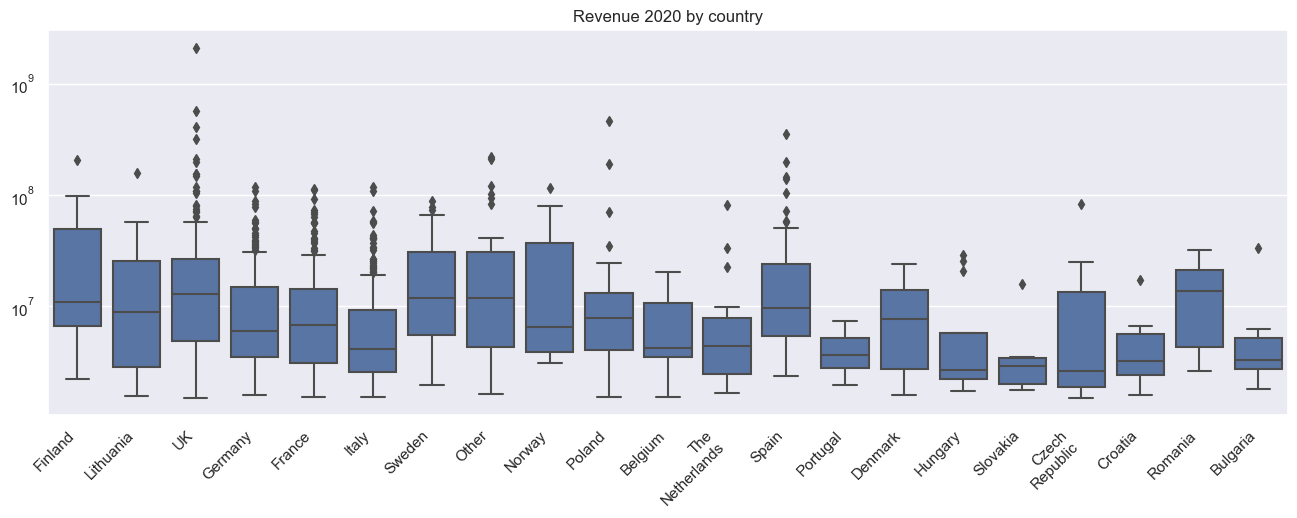

In [ ]:
plt.figure(figsize = (16, 5))

ax = sns.boxplot(data = df, x = 'Country1', y = 'Revenue2020', color = 'C0')
ax.set_yscale('log')

ax.set_xticklabels([label.replace(' ', '\n') for label in df['Country1'].unique()], rotation = 45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Revenue 2020 by country');

- Đa số các nước có doanh thu năm 2020 trung bình dưới mức $10^8$ Euro, trừ một số có ít công ty tham gia (như trường hợp của CAGR) có doanh thu trung bình cao lên tới 200 triệu Euro.
- Doanh thu của các công ty đa số có khoảng tứ phân vị trong khoảng $10^6.2$ tới $10^7.3$, trừ một số nước như Finland, Lithunania, UK, Sweden, Norway có phân bố doanh thu trải rộng hơn và cao hơn.